In [125]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import pairwise_distances
from joblib import Parallel, delayed
import seaborn as sns
import plotly as plt

In [ ]:
input_file = "tiny.csv"
output_file = f"results_jaccard_{input_file}"
passeport = "passport_fonio.txt"

In [ ]:
## passeport fonio

In [ ]:
pass_df= pd.read_csv(passeport, sep=' ')

In [ ]:
pass_df.tail()

,ID,country,species
242,Q27_02_02,Nigeria,Digitaria exilis
243,Q27_04_01,Nigeria,Digitaria exilis
244,Q31_02_02,Nigeria,Digitaria exilis
245,Q31_04_01,Nigeria,Digitaria exilis
246,Q32_07_02,Nigeria,Digitaria exilis


In [ ]:
pass_df['ID'] = pass_df['ID'].str.replace('_','')
pass_df['ID'] = pass_df['ID'].str.replace('-','')
pass_df['ID'] = pass_df['ID'].str.replace('NER2011','NER')
pass_df['ID'] = pass_df['ID'].str.replace('MNHNPP','PP')

In [ ]:
pass_df.tail()

,ID,country,species
242,Q270202,Nigeria,Digitaria exilis
243,Q270401,Nigeria,Digitaria exilis
244,Q310202,Nigeria,Digitaria exilis
245,Q310401,Nigeria,Digitaria exilis
246,Q320702,Nigeria,Digitaria exilis


In [ ]:
pass_df.groupby(['species']).count()

,ID,country
species,,
Digitaria exilis,199,199
Digitaria iburua,21,21
Digitaria longiflora,13,13
Digitaria ternata,11,11
other,2,2


In [ ]:
grouped = pass_df.groupby(['species'])

In [134]:
for name, group in grouped:
    print(name)
    print(len(group["ID"].tolist()))

('Digitaria exilis',)
199
('Digitaria iburua',)
21
('Digitaria longiflora',)
13
('Digitaria ternata',)
11
('other',)
2


In [9]:
results_file = "SPLITTED/jaccard_100x10000.txt"

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
df_s = pd.read_csv(results_file, sep="\t", decimal='.')
df_s['Pop'] = df_s['Pop'].str.replace('Digitaria','D ')
df_s.head()


,input_file,Kmers_nb,Pop,Size_pop,Jaccard_Average_Disimilarity
0,xaa.txt,50000,D exilis,199,0.305329
1,xaa.txt,50000,D exilis,199,0.303862
2,xaa.txt,50000,D exilis,199,0.299224
3,xaa.txt,50000,D exilis,199,0.297954
4,xaa.txt,50000,D exilis,199,0.299823


### On veut étudier ici l'influence de la pop de fonio sur la disimilarity de jaccard.

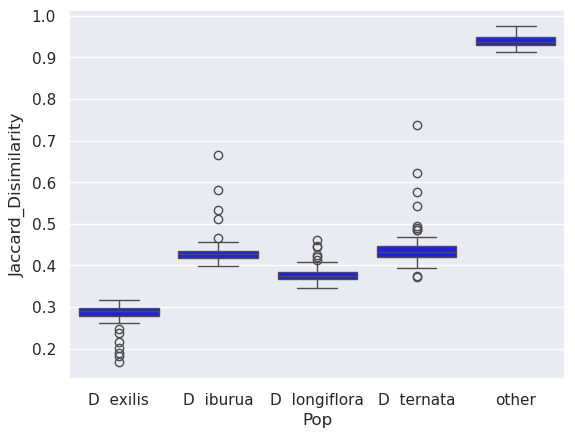

In [12]:
sns.set()
ax = sns.boxplot(x="Pop", y="Jaccard_Average_Disimilarity", data=df_s, color='blue')
plt.xlabel('Pop')
plt.ylabel('Jaccard_Disimilarity')
#plt.title('Boîtes à moustaches')
plt.show()

In [13]:
gp = df_s.groupby(['Pop'])
with open('tmp_stats_pop_fonio.txt', "w") as fd:
    fd.write(f'Population\tJacc_mean\tJaccard_var\tJaccard_var_corr\tJaccard_std\tJaccard_coeffvariation\tMean-2*std\tMean+2*std\n')
    for name, group in gp:
        fd.write(
            f"{name[0]}\t{group.Jaccard_Average_Disimilarity.mean()}\t{group.Jaccard_Average_Disimilarity.var()}\t{group.Jaccard_Average_Disimilarity.var(ddof=1)}\t{group.Jaccard_Average_Disimilarity.std()}\t{(group.Jaccard_Average_Disimilarity.std()/group.Jaccard_Average_Disimilarity.mean())}\t{group.Jaccard_Average_Disimilarity.mean() - 2*(group.Jaccard_Average_Disimilarity.std())}\t{group.Jaccard_Average_Disimilarity.mean() + 2*(group.Jaccard_Average_Disimilarity.std())}\n")

In [14]:
summary_stats = pd.read_csv('tmp_stats_pop_fonio.txt', sep="\t", decimal='.')
summary_stats

,Population,Jacc_mean,Jaccard_var,Jaccard_var_corr,Jaccard_std,Jaccard_coeffvariation,Mean-2*std,Mean+2*std
0,D exilis,0.283280,0.000628,0.000628,0.025053,0.088440,0.233174,0.333386
1,D iburua,0.431045,0.001138,0.001138,0.033740,0.078274,0.363566,0.498524
2,D longiflora,0.378836,0.000355,0.000355,0.018839,0.049730,0.341157,0.416515
3,D ternata,0.439251,0.002042,0.002042,0.045185,0.102869,0.348881,0.529622
4,other,0.938903,0.000150,0.000150,0.012257,0.013055,0.914388,0.963418


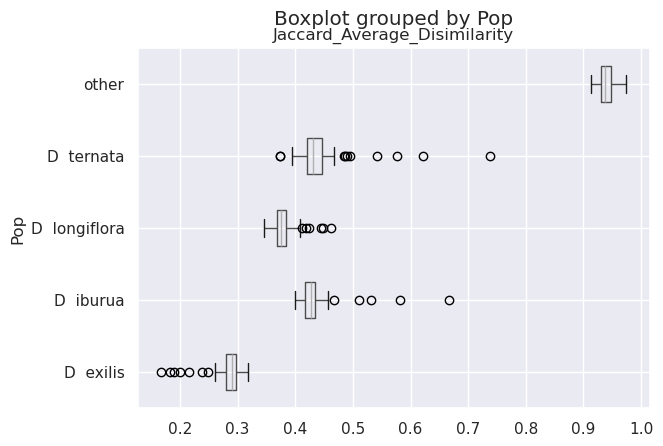

In [15]:
df_s.boxplot(column="Jaccard_Average_Disimilarity", by="Pop", vert=False)
plt.show()

<Axes: xlabel='Jaccard_Average_Disimilarity', ylabel='Pop'>

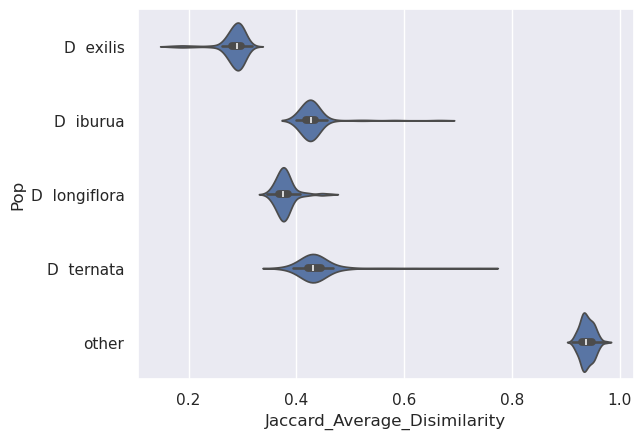

In [16]:
sns.violinplot(data=df_s, x="Jaccard_Average_Disimilarity", y="Pop")